In [1]:
!pip install pycausalimpact
!pip install git+https://github.com/joshcarty/google-searchconsole

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/joshcarty/google-searchconsole to /tmp/pip-req-build-x4a2r3_m
  Running command git clone -q https://github.com/joshcarty/google-searchconsole /tmp/pip-req-build-x4a2r3_m


In [37]:
# Open the CSV file with the data to analyze (we have only dates here)
# >>>Remove CTR Column!!<<<

data = pd.read_csv('dataset.csv', # Update the string here to change the file. Upload the file first.
                 header=0,
                 encoding="utf-8",
                 index_col='Date') 
data= data.loc[~data.index.duplicated(), :] #This is for removing duplicated label in index. Still don't know why there's duplicated labels.
print("we have a total of:", len(data), " samples")

data.head()

we have a total of: 208  samples


,Clicks,Impressions,Position
Date,,,
2022-02-01,1640,67153,22.6
2022-02-02,1207,57757,22.2
2022-02-03,1110,63985,23.8
2022-02-04,1391,72583,21.9
2022-02-05,1362,69307,19.7


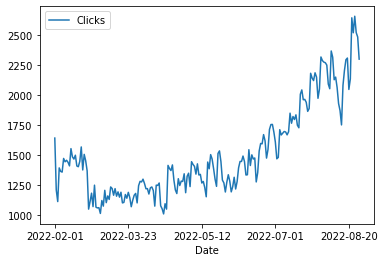

In [38]:
data.sort_values(by=['Date'], inplace=True, ascending=True)
data[['Clicks']].plot()

2022-02-01
2022-08-27


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1719.46            159910.0
Prediction (s.d.)         1242.5 (20.54)     115552.08 (1910.25)
95% CI                    [1200.78, 1281.3]  [111672.67, 119160.71]

Absolute effect (s.d.)    476.97 (20.54)     44357.92 (1910.25)
95% CI                    [438.16, 518.68]   [40749.29, 48237.33]

Relative effect (s.d.)    38.39% (1.65%)     38.39% (1.65%)
95% CI                    [35.26%, 41.75%]   [35.26%, 41.75%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


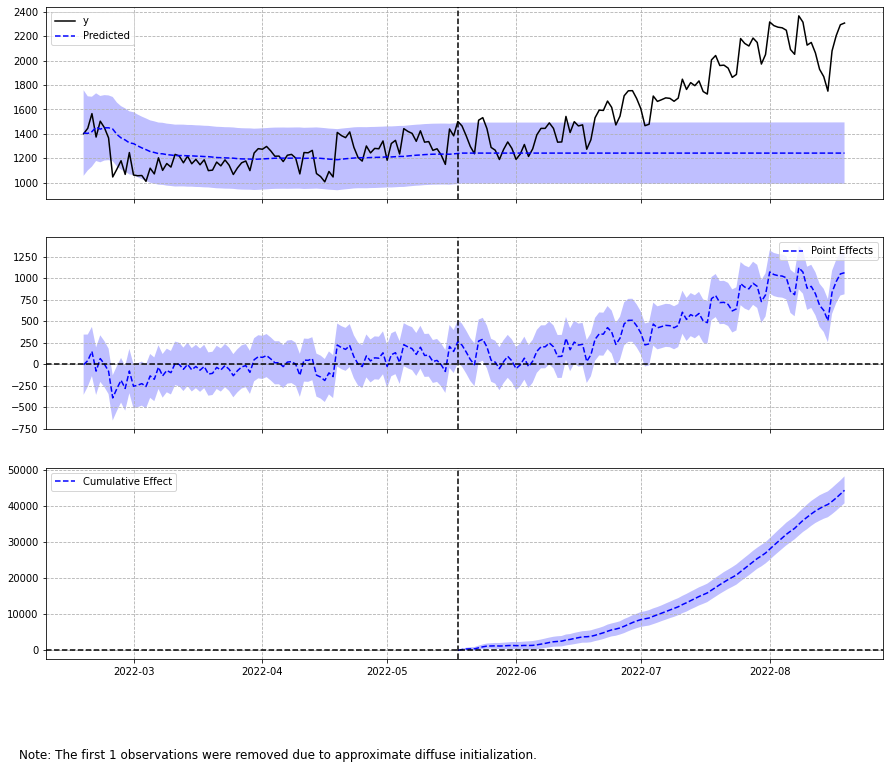

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1719.46. By contrast, in the absence of an
intervention, we would have expected an average response of 1242.5.
The 95% interval of this counterfactual prediction is [1200.78, 1281.3].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 476.97 with a 95% interval of
[438.16, 518.68]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 159910.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 115552.08. The 95% interval of this prediction is [111672.67, 119160.71].


The above results are given in terms of absolute numbers. In relative
terms,

In [39]:
print(np.min(data.index.values))
print(np.max(data.index.values))

pre_period = ["2022-02-16", "2022-05-18"] # before changings
post_period = ["2022-05-19", "2022-08-19"]

#ci = CausalImpact(data.iloc[:, 0], pre_period, post_period, nseasons=[{'period': 52}])
ci = CausalImpact(data['Clicks'], pre_period, post_period) # here we might add seasonality as in the example above

print(ci.summary())
ci.plot()
print(ci.summary(output='report'))